In [1]:
import numpy as np 
import pandas as pd 

import os
        
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
df=pd.read_csv('ODI.csv')
df=df.drop(columns=['Unnamed: 0'])
df.sample(10)

,Team_1,Team_2,Winner,Margin,Ground,Match Date
4364,U.A.E.,Namibia,U.A.E.,43 runs,Sharjah,"Mar 12, 2022"
4482,New Zealand,India,New Zealand,7 wickets,Auckland,"Nov 25, 2022"
1521,India,New Zealand,New Zealand,43 runs,Rajkot,"Nov 5, 1999"
324,Australia,India,India,3 wickets,Sharjah,"Mar 29, 1985"
4084,New Zealand,India,India,90 runs,Mount Maunganui,"Jan 26, 2019"
827,West Indies,Pakistan,Pakistan,38 runs,Kingstown,"Mar 30, 1993"
2304,Pakistan,England,Pakistan,7 wickets,Lahore,"Dec 12, 2005"
587,Pakistan,Sri Lanka,Pakistan,6 runs,Lucknow,"Oct 27, 1989"
2811,Kenya,Zimbabwe,Zimbabwe,66 runs,Nairobi (Gym),"Feb 1, 2009"
4295,England,Sri Lanka,England,5 wickets,Chester-le-Street,"Jun 29, 2021"


In [3]:
df.shape

(4578, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team_1      4578 non-null   object
 1   Team_2      4578 non-null   object
 2   Winner      4578 non-null   object
 3   Margin      4578 non-null   object
 4   Ground      4578 non-null   object
 5   Match Date  4578 non-null   object
dtypes: object(6)
memory usage: 214.7+ KB


In [5]:
df.nunique()

Team_1          28
Team_2          28
Winner          30
Margin         239
Ground         188
Match Date    3903
dtype: int64

In [6]:
df.Winner.unique()

array(['Australia', 'England', 'New Zealand', 'no result', 'West Indies',
       'Pakistan', 'India', 'Sri Lanka', 'Zimbabwe', 'tied',
       'South Africa', 'Kenya', 'U.A.E.', 'Bangladesh', 'Canada',
       'Netherlands', 'ICC World XI', 'Africa XI', 'Asia XI', 'Bermuda',
       'Ireland', 'Scotland', 'Afghanistan', 'P.N.G.', 'Hong Kong',
       'Nepal', 'Namibia', 'Oman', 'U.S.A.', 'Jersey'], dtype=object)

In [7]:
df.Team_1.unique()

array(['Australia', 'England', 'New Zealand', 'East Africa', 'Sri Lanka',
       'Pakistan', 'India', 'West Indies', 'Canada', 'Bangladesh',
       'South Africa', 'Zimbabwe', 'U.A.E.', 'Netherlands', 'Kenya',
       'Scotland', 'Namibia', 'Hong Kong', 'Asia XI', 'Africa XI',
       'Bermuda', 'Ireland', 'Afghanistan', 'P.N.G.', 'Nepal', 'Oman',
       'U.S.A.', 'Jersey'], dtype=object)

# No of Matches Played by each Team

In [8]:
team1=df.Team_1.value_counts()
team2=df.Team_2.value_counts()
teams=team1+team2
teams['Africa XI']=team1['Africa XI']
teams['ICC World XI']=team2['ICC World XI']
teams=pd.DataFrame(teams)
teams['count']=teams
teams['Teams']=teams.index
teams.reset_index(drop=True,inplace=True)
teams=teams.sort_values('count',ascending=False)
fig = px.bar(teams, x="Teams", y="count") 
fig.show()

# Chasing vs Defending

In [9]:
By=[]
runs=[]
wickets=[]
for i in df['Margin']:
    
    margin=i.split(' ')
    
    if(len(margin)==2 and (margin[1]=='runs' or margin[1]=='run')):
        By.append('Defending')
        runs.append(int(margin[0]))
    elif(len(margin)==2 and (margin[1]=='wickets' or margin[1]=='wicket')):
        By.append('Chasing')
        wickets.append(int(margin[0]))
    else:
        By.append('Tied')

df['Wonby']=By

In [18]:
fig2=px.histogram(df,x='Wonby')
fig2.show()

<AxesSubplot: xlabel='count', ylabel='Wonby'>

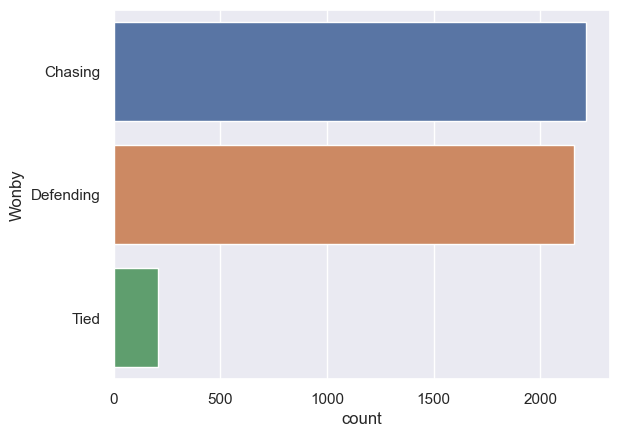

In [10]:
sns.set(style='darkgrid')
sns.countplot(y='Wonby',data=df,order = df['Wonby'].value_counts().index)

# Most Wins

<AxesSubplot: xlabel='count', ylabel='Winner'>

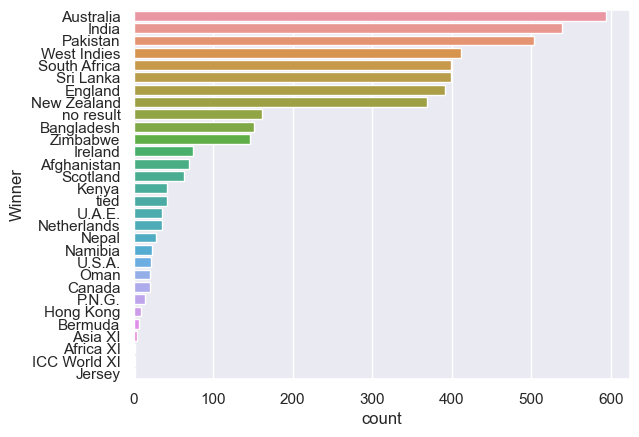

In [11]:
sns.set(style='darkgrid')
sns.countplot(y='Winner',data=df,order = df['Winner'].value_counts().index)

# Top Venues

In [12]:
grounds=df['Ground'].value_counts()
grounds=pd.DataFrame(grounds)
grounds['Grounds']=grounds.index
grounds.reset_index(drop=True,inplace=True)
grounds=grounds[:25]
fig = px.bar(grounds, x="Grounds", y="Ground") 
fig.show()

# ODIs played in each Year

<AxesSubplot: xlabel='year', ylabel='count'>

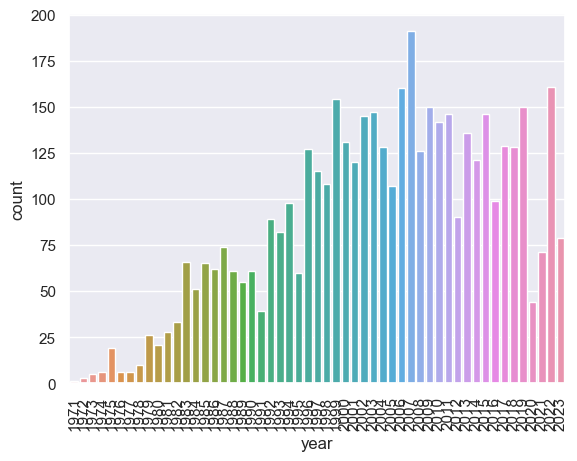

In [28]:
year=[]
for i in df['Match Date']:
    data=i.split(' ')
    year.append(int(data[-1]))
df['year']=year
years=df.copy()
years=years.sort_values('year',ascending=True)
plt.xticks(rotation=90)
sns.countplot(x='year',data=years)

In [26]:
years['year']

0       1971
1       1972
2       1972
3       1972
4       1973
        ... 
4521    2023
4520    2023
4519    2023
4537    2023
4577    2023
Name: year, Length: 4578, dtype: object

# Conclusions
* **India(1029) played most number of matches** since the inagural of ODIs in 1971 ,followed by Australia(978).
* The difference between number of matches won by chasing (2213) and by defending (2157) is very minute.It is worthy to note that almost 208 matches were tied from 1971 till today.
* **Australia(594) dominated the ODIs by winning the most number of matches** followed by India (539),Pakistan (503),West Indies (411) and South Africa (399).
* Although Australia and India played the most number of matches, the venue which hosted **most number of matches Sharjha**(244), is located in Pakisthan.Harare (174),Sydney (160),Melbourne (150), and Columbia (138) occupy the subsequent positions respectectively.
* 1. The number of ODI matches played in a year never crossed 100 till 1995, this can be correlated to the popularity of test matches in 90's.
  2. After that we can see around 150 matches being played consistently over the next 2 decades
  3. We can see an abnomality in 2020.This is due to the Covid-19 pandemic and also we can notice the number of matches picking up pace after that.
  4. Considering the popularity of T20 cricket and domestic leagues we may see a decrease in the number of ODI matches played in the up coming years. 

In [32]:
df.to_csv('Final_data.csv',index=False)